## Fashion MNIST Classification project

In [1]:
#Checking the gpu availability in mac for using torch
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [2]:
#importing dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from prettytable import PrettyTable
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import SVC
from scipy.stats import uniform, randint


sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")


## Loading Fashion MNIST Dataset

In [3]:
#Load Fashion-Mnist Dataset
fashion_mnist = fetch_openml(name="Fashion-MNIST", cache = True)
fashion_mnist_df = pd.DataFrame(fashion_mnist.data, columns=fashion_mnist.feature_names)
fashion_mnist_df['target'] = fashion_mnist['target'].astype(int)
fashion_mnist_df.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
7,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,82.0,237.0,231.0,70.0,0.0,0.0,2
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [4]:
fashion_mnist_df.shape

(70000, 785)

In [5]:
#Checking missing values in the dataset
fashion_mnist_df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
target      0
Length: 785, dtype: int64

We see that there are no missing values in the dataset.

In [6]:
fashion_mnist_df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914,4.500000
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924,2.872302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000,9.000000


In [7]:
X = fashion_mnist_df.drop('target', axis = 1).values #Get the data 28x28 total 784 features
y = fashion_mnist_df['target'].values #Get the target values or class

In [8]:
X.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
class_mapping = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}
def true_label(x):
    return class_mapping[x]

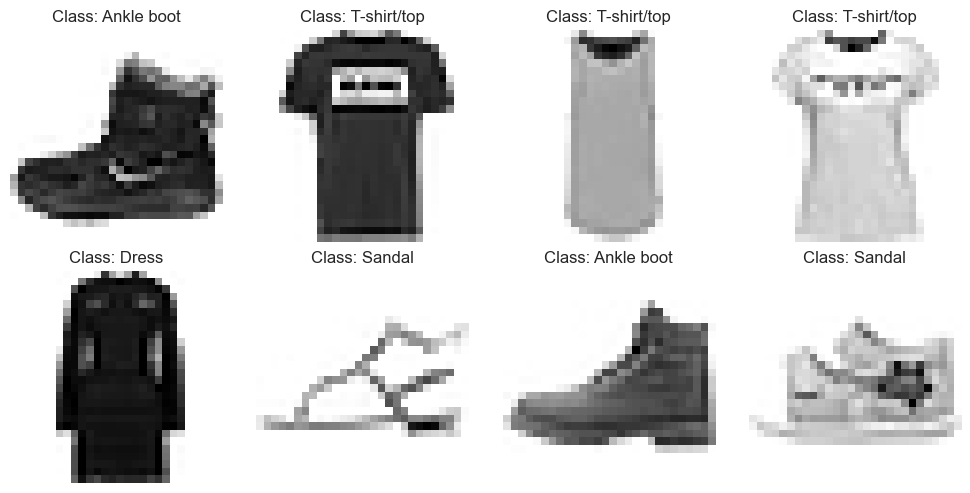

In [11]:
#Checking some data samples
plt.figure(figsize=(10, 5))
k = [0, 1, 2, 34, 500, 14578, 50000, 69999]

for i, example in enumerate(k, 1):
    plt.subplot(2, 4, i)
    g = plt.imshow(X.reshape(-1, 28, 28, 1)[example][:, :, 0], cmap=plt.cm.binary)
    plt.title('Class: ' + true_label(y[example]))
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## Data Preprocessing

In [13]:
#Coverting the scale of pixels from 0-1 
X_train = X_train/255.0
X_test = X_test/255.0


## EDA

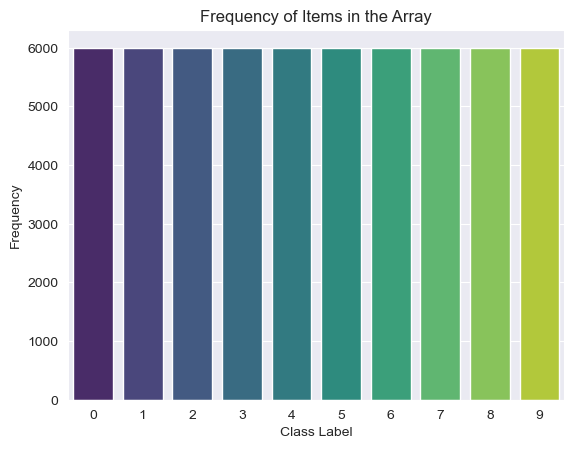

In [14]:
sns.countplot(x = y_train, palette="viridis")

plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Frequency of Items in the Array")

# Show the plot
plt.show()

Shows the training data has equal distribution of classes.

## Model Training

In [47]:
print("X_train shape before Dimensionality Reduction: ",X_train.shape)

X_train shape before Dimensionality Reduction:  (60000, 784)


In [23]:
print("Y_train shape before Dimensionality Reduction: ",y_train.shape)

Y_train shape before Dimensionality Reduction:  (60000,)


In [21]:
print("X_test shape before Dimensionality Reduction: ", X_test.shape)

(10000, 784)

In [24]:
print("Y_test shape before Dimensionality Reduction: ",y_test.shape)

Y_test shape before Dimensionality Reduction:  (10000,)


In [25]:
# PCA 

from sklearn.decomposition import PCA 

pca = PCA(n_components = 0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
print("X_train shape after Dimensionality Reduction: ",X_train_pca.shape)
print("X_test shape after Dimensionality Reduction: ", X_test_pca.shape)

X_train shape after Dimensionality Reduction:  (60000, 187)
X_test shape after Dimensionality Reduction:  (10000, 187)


In [30]:
print("The total variance campured after Dimensionality Reduction is: ", np.sum(pca.explained_variance_ratio_))

The total variance campured after Dimensionality Reduction is:  0.9500039103537353


In [31]:
# SVM Classifier

#defining parameter grid
parameters = [{
    'kernel': ['linear'],  # Setting the kernel to Linear
    'C':uniform(0.1,1000)  # Regularization parameter.
    },
    {'kernel' : ['rbf'], # Setting the kernel to Radial-Basis-Function
     'C':uniform(0.1,1000), # Regularization parameter.
     'gamma': uniform(0.0001,3) # Kernel coefficient: influence of a single training sample
    },
    {
    'kernel': ['sigmoid'], # Setting the kernel to Sigmoid
    'C':uniform(0.1,1000), # Regularization parameter.
    'coef0':uniform(0.0001,10), # Independent term in kernel function
    'gamma': uniform(0.0001,3) # Kernel coefficient: influence of a single training sample
    },
    {
    'kernel': ['poly'], # Setting the kernel to Polynomial
    'C':uniform(0.1,1000), # Regularization parameter.
    'degree':randint(2,7), # Degree of the polynomial kernel function
    'coef0':uniform(0.0001,10), # Independent term in kernel function
    'gamma': uniform(0.0001,3) # Kernel coefficient: influence of a single training sample
    }
    ] 

svc = SVC()

random_search = RandomizedSearchCV(
    estimator = svc, 
    param_distributions = parameters,
    n_iter=50,
    cv = 5, 
    random_state=5,
    scoring='accuracy', 
    verbose=10,
    n_jobs = -1)

random_search.fit(X_train_pca, y_train)


best_params_svc = random_search.best_params_
best_accuracy_svc = random_search.best_score_
best_svc = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)


print("---------------------------------------")
print("Best Parameters:", best_params_svc)
print("---------------------------------------")
print("Best Accuracy in Cross Validation:", best_accuracy_svc)
print("Test Accuracy:", accuracy)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 4/5; 1/50] START C=55.28012397536853, coef0=8.313378347754414, degree=2, gamma=2.9384349974843382, kernel=poly
[CV 4/5; 1/50] END C=55.28012397536853, coef0=8.313378347754414, degree=2, gamma=2.9384349974843382, kernel=poly;, score=0.890 total time= 2.7min
[CV 3/5; 3/50] START C=354.2380429150014, coef0=4.86647996858362, degree=6, gamma=0.5632636859837549, kernel=poly
[CV 3/5; 3/50] END C=354.2380429150014, coef0=4.86647996858362, degree=6, gamma=0.5632636859837549, kernel=poly;, score=0.893 total time= 3.0min
[CV 1/5; 4/50] START C=649.5588832440994, gamma=2.4585183791572427, kernel=rbf..
[CV 1/5; 4/50] END C=649.5588832440994, gamma=2.4585183791572427, kernel=rbf;, score=0.165 total time=45.7min
[CV 4/5; 4/50] START C=649.5588832440994, gamma=2.4585183791572427, kernel=rbf..
[CV 4/5; 4/50] END C=649.5588832440994, gamma=2.4585183791572427, kernel=rbf;, score=0.165 total time=59.7min
[CV 4/5; 5/50] START C=158.409867712

In [38]:
cv_results = random_search.cv_results_
print(cv_results.keys())
results_svc = {}
for score, params in zip(cv_results["mean_test_score"],cv_results["params"]):
    results_svc.update({str(params) : score})


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_coef0', 'param_degree', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [39]:
import pandas as pd
df_svc = pd.DataFrame.from_dict(results_svc, orient = 'index')

In [40]:
df_svc.reset_index(inplace=True)

In [41]:
df_svc.columns = ['Parameters','Mean_Score']

In [56]:
df_svc.sort_values('Mean_Score', ascending = False, inplace=True)

In [61]:
df_svc.head()

,Parameters,Mean_Score
32,"{'C': 792.3413238490966, 'coef0': 4.4618012475...",0.895417
47,"{'C': 242.20767225593488, 'coef0': 0.850804617...",0.895317
13,"{'C': 696.7649294064507, 'coef0': 5.7542370741...",0.895000
12,"{'C': 985.7244028041889, 'coef0': 2.5910759641...",0.894767
9,"{'C': 561.4371205346787, 'coef0': 0.9055869553...",0.894617


In [57]:
df_svc.to_csv("Best_params_svc.csv",index=False)

In [44]:
import pickle

# Save the model to a file
with open('svc_model.pkl', 'wb') as file:
    pickle.dump(best_svc, file)

In [62]:
from sklearn.metrics import accuracy_score
y_pred = best_svc.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8913


In [64]:
d1 = {'Logistic Regression': [{'C':0.1, 'max_iter': 100}, "84.22%"],
      'K Nearest Neighbors': [{'metric' : 'manhattan', 'n_neighbors' : 4, 'weights' : 'distance'},"86.92%"],
      'Support Vector Classifier': [{'C' : 792.3413238490966, 'coef0' : 4.461801247588382, 'degree' : 3, 
                                     'gamma' : 2.4015292622517093, 'kernel' : 'poly'},"89.13%"],
      'XGBoost Classifier': [{'subsample' : 0.7, 'max_depth' : 5, 'learning_rate' : 0.2, 'gamma' : 0.5},"86.74%"],
      'Decision Tree Classifier': [{'criterion' : 'entropy', 'min_samples_leaf' : 2, 'min_samples_split' : 5},"77.92%"],
      'Random Forest Classifier': [{'criterion' : 'gini', 'min_samples_leaf' : 1, 'min_samples_split' : 5}, "85.73%"]
     
     }

In [72]:
df1 = pd.DataFrame.from_dict(d1).T
df1.reset_index(inplace=True)

In [73]:
df1.columns = ['ML Model','Best Parameters', 'Test Accuracy']

In [74]:
df1

,ML Model,Best Parameters,Test Accuracy
0,Logistic Regression,"{'C': 0.1, 'max_iter': 100}",84.22%
1,K Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 4, 'wei...",86.92%
2,Support Vector Classifier,"{'C': 792.3413238490966, 'coef0': 4.4618012475...",89.13%
3,XGBoost Classifier,"{'subsample': 0.7, 'max_depth': 5, 'learning_r...",86.74%
4,Decision Tree Classifier,"{'criterion': 'entropy', 'min_samples_leaf': 2...",77.92%
5,Random Forest Classifier,"{'criterion': 'gini', 'min_samples_leaf': 1, '...",85.73%


In [76]:
df1.to_latex("hyperparameters.tex", index = False, column_format='rcl')